In [53]:
import os
import json
import pandas as pd

def load_combined_report_dataframe(json_filename="report.json"):
    # Use relative path (assumes same directory)
    json_path = os.path.join(os.getcwd(), json_filename)

    with open(json_path, "r") as f:
        all_reports = json.load(f)

    records = []

    for key, report in all_reports.items():
        try:
            row_data = {}

            # Merge all relevant sections
            row_data.update(report.get("performance", {}))
            row_data.update(report.get("timing", {}))
            row_data.update(report.get("complexity", {}))

            row_data["iteration"] = int(key)  # add the loop index for row label
            records.append(row_data)
        except Exception as e:
            print(f"Error processing report {key}: {e}")

    df = pd.DataFrame(records).set_index("iteration").sort_index()
    return df

df = load_combined_report_dataframe()

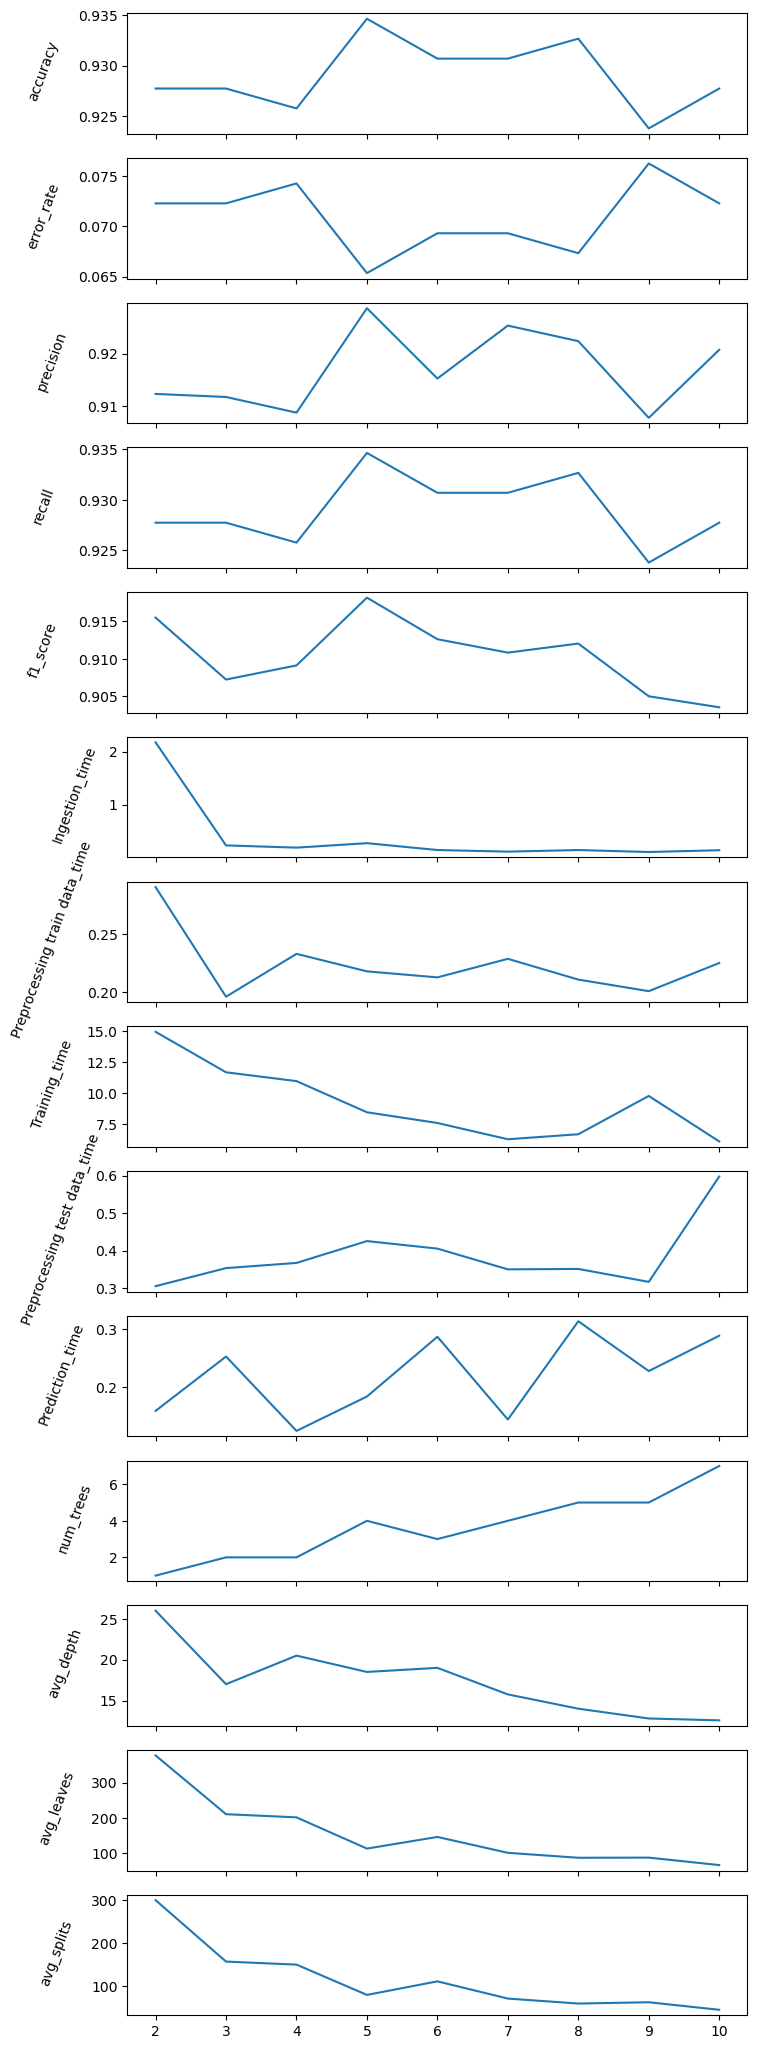

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=len(df.columns), ncols=1, sharex=True, figsize=(len(df) + 1, len(df.columns)*2))
fig.set_size_inches(8,26)
i = 0
for col in df:
    vals = df[col]
    ax[i].plot(vals.index, vals.values)
    ax[i].set_ylabel(col, rotation=70, labelpad=20)
    i +=1